# Notebook to test the stylings for 
- Matplotlib and seaborn
- PLotly

In [1]:
# Importing libraries

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import sin, pi
import warnings
import plotly.express as px
import plotly.graph_objects as go

import mpl_style as style

## Choose between interactive or static plots:

In [2]:
# interactive plots:
# %matplotlib notebook

# static plots:
%matplotlib inline

## Example Seaborn/Matplotlib Plots

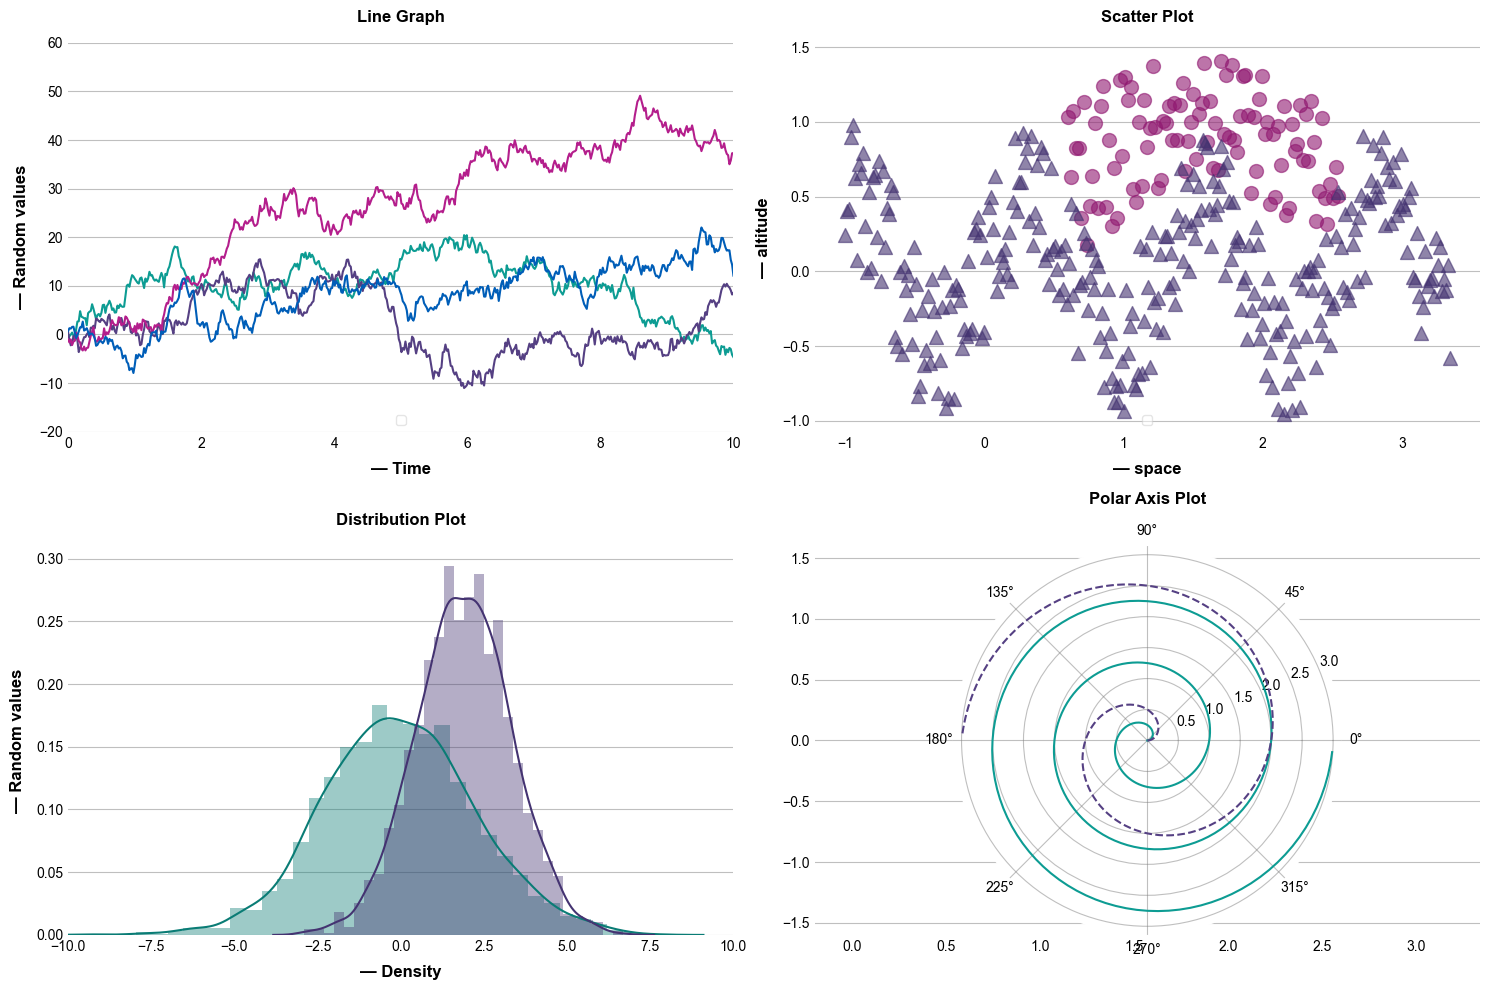

In [3]:
# LINE PLOT
def line_plot(ax):
    rng = np.random.RandomState(4)
    x = np.linspace(0, 10, 500)
    y = np.cumsum(rng.randn(500, 4), 0)
    ax.set_title('Line Graph')
    ax.set_xlabel('— Time')
    ax.set_ylabel('— Random values')
    ax.legend(['Bitcoin', 'Ethereum', 'Dollar', 'Oil'])
    ax.set_xlim([0, 10])
    ax.set_ylim([-20, 60])
    ax.plot(x, y)

# SCATTER PLOT
def scatter_plot(ax):
    rng = np.random.RandomState(4)
    x = np.linspace(0.6, pi-0.6, 100)
    y = [sin(x) + rng.rand() - 0.5 for x in x]
    t = np.linspace(-1, pi+0.2, 300)
    z = [0.5*sin(x*5) + rng.rand() - 0.5 for x in t]
    ax.set_title('Scatter Plot')
    ax.set_xlabel('— space')
    ax.set_ylabel('— altitude')
    ax.legend(['sun', 'mountain'])
    plt.xlim([-0.2, pi+0.2])
    plt.ylim([-1.6, 1.6])
    ax.scatter(x, y, s=100, alpha=.6, color='C12')
    ax.scatter(t, z, s=100, alpha=.6, marker='^', color='C11')

# DISTRIBUTION PLOT
def distribution_plot(ax):
    np.random.seed(2)
    data = np.random.multivariate_normal((0, 0), [(5, 2), (2, 2)], size=2000)
    data[:, 1] = np.add(data[:, 1], 2)
    ax.set_title('Distribution Plot')
    ax.set_xlabel('— Density')
    ax.set_ylabel('— Random values')
    ax.set_xlim([-10, 10])
    ax.set_ylim([0, 0.31])   
    
    # supress seaborn FutureWarnings
    warnings.simplefilter(action='ignore', category=(FutureWarning, UserWarning))
    for col in range(2):
        sns.distplot(data[:, col], ax=ax, color='C1' + str(col+0))
    

# POLAR PLOT
def polar_plot(ax):
    r = np.arange(0, 3.0, 0.01)
    theta = 2 * pi * r
    ax.plot(theta, r)
    ax.plot(0.5 * theta, r, ls='--')
    ax.set_title("Polar Axis Plot")


# Combines plot
def plot():
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    line_plot(axes[0, 0])
    scatter_plot(axes[0, 1])
    distribution_plot(axes[1, 0])
    ax = plt.subplot(2, 2, 4, projection='polar')
    polar_plot(ax)
    plt.tight_layout()
    plt.savefig("examples/sample_plots.png")


style.mpl_style()
plot()

## Example Plotly Plots

In [4]:
# LINE PLOT
def line_plot_plotly():
    rng = np.random.RandomState(4)
    x = np.linspace(0,10,500)
    y = np.cumsum(rng.randn(500, 4), axis=0)

    fig = go.Figure()
    labels = ['Bitcoin', 'Ethereum', 'Dollar', 'Oil']
    for i in range(4):
        fig.add_trace(go.Scatter(x=x, y=y[:, i], mode='lines', name=labels[i]))
    fig.update_layout(
        title ='Line Graph',
        xaxis_title = 'Time',
        yaxis_title = 'Random values',
    )
    return fig
    

# SCATTER PLOT
def scatter_plot_plotly():
    rng = np.random.RandomState(4)
    x = np.linspace(0.6, pi-0.6, 100)
    y = [sin(x) + rng.rand() - 0.5 for x in x]
    t = np.linspace(-1, pi+0.2, 300)
    z = [0.5*sin(x*5) + rng.rand() - 0.5 for x in t]

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=x, y=y, mode='markers', name='sun', marker=dict(size=10, opacity=0.6)))
    fig.add_trace(go.Scatter(x=t, y=z, mode='markers', name='mountain', marker=dict(size=10, opacity=0.6, symbol='triangle-up')))
    
    fig.update_layout(
        title ='Scatter Graph',
        xaxis_title = 'Space',
        yaxis_title = 'Altitude',
    )
    return fig


# DISTRIBUTION PLOT
def distribution_plot_plotly():
    np.random.seed(2)
    data = np.random.multivariate_normal((0,0), [(5,2), (2,2)], size=2000)
    data[:, 1] = np.add(data[:, 1], 2)
    
    fig = go.Figure()
    for col in range(2):
        fig.add_trace(go.Histogram(x=data[:, col], name=f'Distribution{col+1}', opacity=0.7, nbinsx=30))
    
    fig.update_layout(
        title ='Distribution Plot',
        xaxis_title = 'Random Values',
        yaxis_title = 'Density',
        barmode = 'overlay'
    )
    return fig


def plot_all():
    figs = [line_plot_plotly(), scatter_plot_plotly(), distribution_plot_plotly()]

    for i, fig in enumerate(figs):
        fig.show()
        fig.write_html(f"examples/{i}.plotly.html")

style.plotly_style()
plot_all()